In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy

# Test 5: Relevance of Different Hamiltonian Terms (Swap)
### (*comments at bottom of document*)

In [2]:
from scipy.constants import hbar
π = np.pi
µs_to_ns = 1e3
norm_fact = 1/(np.sqrt(2))

### States
$|g\rangle=(1,0,0)^T$, $|e\rangle=(0,1,0)^T$, $|f\rangle=(0,0,1)^T$, $|r_0\rangle=(1,0)^T$, $|r_1\rangle=(0,1)^T$

### Creation/Annihilation Operators (q1, q2, resonator)
$b_1,b_1^\dagger, b_2, b_2^\dagger, c, c^\dagger.$ 

In [3]:
num_qubit_states =3
num_res_states = 2

g_state = qt.basis(num_qubit_states, 0)
e_state = qt.basis(num_qubit_states, 1)
f_state = qt.basis(num_qubit_states, 2)

r0_state = qt.basis(num_res_states, 0)
r1_state = qt.basis(num_res_states, 1)

In [4]:
b1 = qt.tensor(qt.destroy(num_qubit_states), qt.qeye(num_qubit_states), qt.qeye(num_res_states))
b1dag = b1.dag() 
b2 = qt.tensor(qt.qeye(num_qubit_states), qt.destroy(num_qubit_states), qt.qeye(num_res_states))
b2dag = b2.dag() 
c = qt.tensor(qt.qeye(num_qubit_states), qt.qeye(num_qubit_states), qt.destroy(num_res_states))
cdag = c.dag()

In [5]:
gg0_proj = qt.tensor(g_state, g_state, r0_state).proj()
ge0_proj = qt.tensor(g_state, e_state, r0_state).proj()
gf0_proj = qt.tensor(g_state, f_state, r0_state).proj()

eg0_proj = qt.tensor(e_state, g_state, r0_state).proj()
ee0_proj = qt.tensor(e_state, e_state, r0_state).proj()
ef0_proj = qt.tensor(e_state, f_state, r0_state).proj()

fg0_proj = qt.tensor(f_state, g_state, r0_state).proj()
fe0_proj = qt.tensor(f_state, e_state, r0_state).proj()
ff0_proj = qt.tensor(f_state, f_state, r0_state).proj()

gg1_proj = qt.tensor(g_state, g_state, r1_state).proj()
ge1_proj = qt.tensor(g_state, e_state, r1_state).proj()
gf1_proj = qt.tensor(g_state, f_state, r1_state).proj()

eg1_proj = qt.tensor(e_state, g_state, r1_state).proj()
ee1_proj = qt.tensor(e_state, e_state, r1_state).proj()
ef1_proj = qt.tensor(e_state, f_state, r1_state).proj()

fg1_proj = qt.tensor(f_state, g_state, r1_state).proj()
fe1_proj = qt.tensor(f_state, e_state, r1_state).proj()
ff1_proj = qt.tensor(f_state, f_state, r1_state).proj()

In [6]:
def plotresult(time_evolution_b):
    ge0_pops = qt.expect(ge0_proj, time_evolution_b.states)
    eg0_pops = qt.expect(eg0_proj, time_evolution_b.states)

    gf0_pops = qt.expect(gf0_proj, time_evolution_b.states)
    fg0_pops = qt.expect(fg0_proj, time_evolution_b.states)
    
    ef0_pops = qt.expect(ef0_proj, time_evolution_b.states)
    fe0_pops = qt.expect(fe0_proj, time_evolution_b.states)

    gg0_pops = qt.expect(gg0_proj, time_evolution_b.states)
    ee0_pops = qt.expect(ee0_proj, time_evolution_b.states)
    #ff0_pops = qt.expect(ff0_proj, time_evolution_b.states)
    
    ge1_pops = qt.expect(ge1_proj, time_evolution_b.states)
    eg1_pops = qt.expect(eg1_proj, time_evolution_b.states)

    gf1_pops = qt.expect(gf1_proj, time_evolution_b.states)
    fg1_pops = qt.expect(fg1_proj, time_evolution_b.states)
    
    ef1_pops = qt.expect(ef1_proj, time_evolution_b.states)
    fe1_pops = qt.expect(fe1_proj, time_evolution_b.states)

    gg1_pops = qt.expect(gg1_proj, time_evolution_b.states)
    ee1_pops = qt.expect(ee1_proj, time_evolution_b.states)
    #ff1_pops = qt.expect(ff1_proj, time_evolution_b.states)
    
    fig, ax = plt.subplots(tight_layout=True)
    ax.plot(t_vec * µs_to_ns, ge0_pops, label="ge0")
    ax.plot(t_vec * µs_to_ns, eg0_pops, label="eg0")
    ax.plot(t_vec * µs_to_ns, gf0_pops, label="gf0")
    ax.plot(t_vec * µs_to_ns, fg0_pops, label="fg0")
    #ax.plot(t_vec * µs_to_ns, gg0_pops, label="gg0")
    ax.plot(t_vec * µs_to_ns, ee0_pops, label="ee0")
    #ax.plot(t_vec * µs_to_ns, ff0_pops, label="ff0")
    
    ax.plot(t_vec * µs_to_ns, ge1_pops, label="ge1")
    ax.plot(t_vec * µs_to_ns, eg1_pops, label="eg1")
    ax.plot(t_vec * µs_to_ns, gf1_pops, label="gf1")
    ax.plot(t_vec * µs_to_ns, fg1_pops, label="fg1")
    #ax.plot(t_vec * µs_to_ns, gg1_pops, label="gg1")
    ax.plot(t_vec * µs_to_ns, ee1_pops, label="ee1")
    #ax.plot(t_vec * µs_to_ns, ff1_pops, label="ff1")

    ax.legend()
    ax.set_xlabel('Time, $t$ [ns]')
    ax.set_ylabel(r'Amplitude Squared, $P_{mn}$')
    ax.set_title('SWAP gate')

    plt.show()
    plt.close()

### Hamiltonian_cross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$


### Hamiltonian_nocross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1)$

### Hamiltonian_nores
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$


In [8]:
def hamiltonian_cross(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t3 = (omega_r + (chi1 * b1dag * b1) + (chi2 * b2dag * b2)) * cdag * c
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t3 + t4 + t5

def hamiltonian_nocross(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t3 = (omega_r + (chi1 * b1dag * b1) + (chi2 * b2dag * b2)) * cdag * c
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    return t1 + t2 + t3 + t4

def hamiltonian_nores(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t4 + t5

In [18]:
def test(te1, te2, te3):
    ra1 = qt.expect(fg1_proj, te1.states)
    rb1 = qt.expect(fg1_proj, te2.states) 
    rc1 = qt.expect(fg1_proj, te3.states)

    ra2 = qt.expect(gf1_proj, te1.states)
    rb2 = qt.expect(gf1_proj, te2.states) 
    rc2 = qt.expect(gf1_proj, te3.states)

    ra3 = qt.expect(ee1_proj, te1.states)
    rb3 = qt.expect(ee1_proj, te2.states) 
    rc3 = qt.expect(ee1_proj, te3.states)
    
    ra4 = qt.expect(fg0_proj, te1.states)
    rb4 = qt.expect(fg0_proj, te2.states) 
    rc4 = qt.expect(fg0_proj, te3.states)

    ra5 = qt.expect(gf0_proj, te1.states)
    rb5 = qt.expect(gf0_proj, te2.states) 
    rc5 = qt.expect(gf0_proj, te3.states)

    ra6 = qt.expect(ee0_proj, te1.states)
    rb6 = qt.expect(ee0_proj, te2.states) 
    rc6 = qt.expect(ee0_proj, te3.states)
    
    ra7 = qt.expect(ge1_proj, te1.states)
    rb7 = qt.expect(ge1_proj, te2.states) 
    rc7 = qt.expect(ge1_proj, te3.states)
    
    print("Check if fg1, gf1, ee1, fg0, gf0, ee0, ge1 populations are the same for different hamiltonians")
    print(ra1.all() == rb1.all() == rc1.all())
    print(ra2.all() == rb2.all() == rc2.all())
    print(ra3.all() == rb3.all() == rc3.all())
    print(ra4.all() == rb4.all() == rc4.all())
    print(ra5.all() == rb5.all() == rc5.all())
    print(ra6.all() == rb6.all() == rc6.all())
    print(ra7.all() == rb7.all() == rc7.all())
    
    print("Check if fg1, gf1, ee1, fg0, gf0, ee0 populations are 0 for different hamiltonians")
    print(ra1.all()==0, ra2.all()==0, ra3.all()==0, 
          ra4.all()==0, ra5.all()==0, ra6.all()==0,
          ra6.all()==0)
    
    #print(ra2)

In [19]:
J_coupling = 2*π * 8
t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

## Test 1
$|\psi_0\rangle=(e,g,1)^T, \omega_1=\omega_2, \alpha_1=\alpha_2 $

Check if fg1, gf1, ee1, fg0, gf0, ee0, ge1 populations are the same for different hamiltonians
True
True
True
True
True
True
True
Check if fg1, gf1, ee1, fg0, gf0, ee0 populations are 0 for different hamiltonians
True True True True True True True


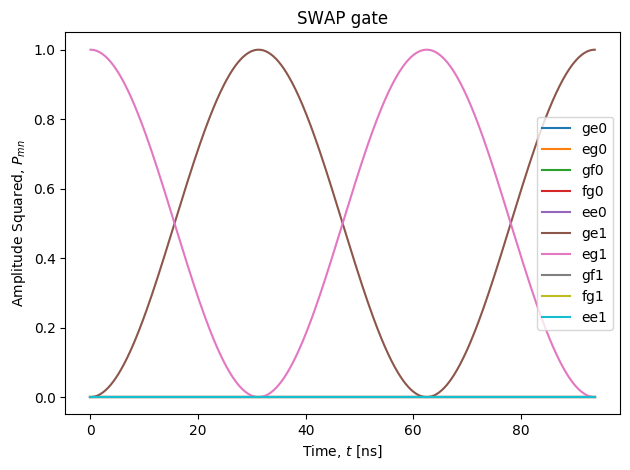

In [22]:
omega1 = 2*π * 6000
omega2 = 2*π * 6000
omegares = 2*π * 7000
alpha = 2*π * -300
chi = 2*π* 4 #(4mhz)

hcross = hamiltonian_cross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnocross = hamiltonian_nocross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnores = hamiltonian_nores(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

psi1 = qt.tensor(e_state, g_state, r1_state)

te1 = qt.mesolve(hcross, psi1, t_vec, [], [])
te2 = qt.mesolve(hnocross, psi1, t_vec, [], [])
te3 = qt.mesolve(hnores, psi1, t_vec, [], [])

test(te1, te2, te3)

plotresult(te1)

## Test 2
$|\psi_0\rangle=(g,e,1)^T, \omega_1-\omega_2=20 MHz, \alpha_1=\alpha_2, \chi = 5GHz$

Check if fg1, gf1, ee1, fg0, gf0, ee0, ge1 populations are the same for different hamiltonians
True
True
True
True
True
True
True
Check if fg1, gf1, ee1, fg0, gf0, ee0 populations are 0 for different hamiltonians
True True True True True True True


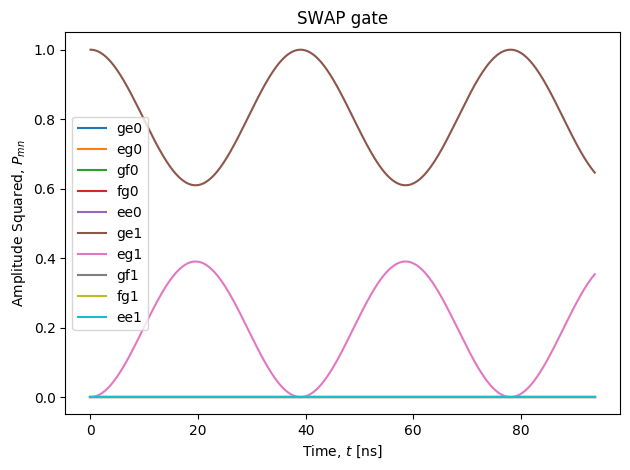

In [23]:
omega1 = 2*π * 6000
detuning = 20 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 5000 #(5000mhz)

hcross = hamiltonian_cross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnocross = hamiltonian_nocross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnores = hamiltonian_nores(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

psi1 = qt.tensor(g_state, e_state, r1_state)

te1 = qt.mesolve(hcross, psi1, t_vec, [], [])
te2 = qt.mesolve(hnocross, psi1, t_vec, [], [])
te3 = qt.mesolve(hnores, psi1, t_vec, [], [])

test(te1, te2, te3)

plotresult(te1)

## Test 3
$|\psi_0\rangle=(f,g,1)^T, \omega_1-\omega_2=20 MHz, \alpha_1=\alpha_2, \chi = 4MHz$

#### fg1, ee1 wiggles but all hamiltonians behave the exact same

Check if fg1, gf1, ee1, fg0, gf0, ee0, ge1 populations are the same for different hamiltonians
True
True
True
True
True
True
True
Check if fg1, gf1, ee1, fg0, gf0, ee0 populations are 0 for different hamiltonians
False True True True True True True


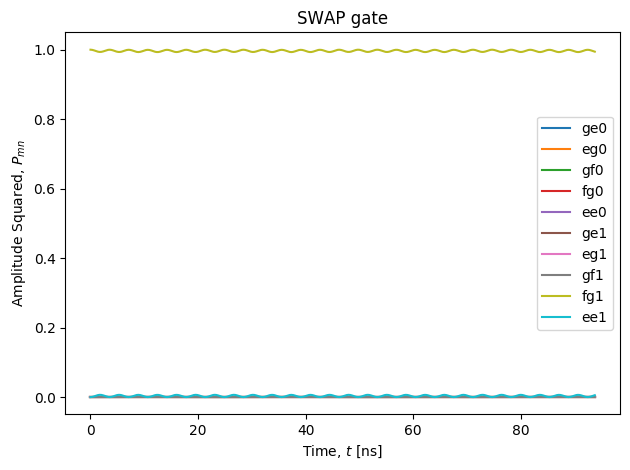

In [24]:
omega1 = 2*π * 6000
detuning = 20 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 4 #(5000mhz)

hcross = hamiltonian_cross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnocross = hamiltonian_nocross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnores = hamiltonian_nores(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

psi1 = qt.tensor(f_state, g_state, r1_state)

te1 = qt.mesolve(hcross, psi1, t_vec, [], [])
te2 = qt.mesolve(hnocross, psi1, t_vec, [], [])
te3 = qt.mesolve(hnores, psi1, t_vec, [], [])

test(te1, te2, te3)

plotresult(te1)

### Approach
I defined three different hamiltonians and time evolved them each with the same initial conditions and looked for the impact of including additional terms to the hamiltonian

I began with the perfectly on resonance case with an initial wave function of ge or eg performing excitation swaps. I observed 0 leakage and 0 difference between the expectation values of populations between different hamiltonians

I began to mess with the detuning, alpha values, chi values to encourage leakage events. I couldn't find any...

### Intuition of QT.Mesolve

https://qutip.org/docs/4.0.2/modules/qutip/mesolve.html

Documentation:

    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.
    
    "Evolve the state vector or density matrix (`rho0`) using a given
    Hamiltonian (`H`) and an [optional] set of collapse operators
    (`c_ops`), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian."

### Lindblad Masters Equation
$\dot{\rho} = -i[H,\rho] + \sum_k \left( L_k \rho L_k^\dagger - \frac{1}{2} \{L_k^\dagger L_k, \rho\} \right)$

### What I believe we are working with (no dissipative / decoherence operators)
$\dot{\rho} = -i[H,\rho]$

### We Provide:
$|\psi_0\rangle, H, tlist$

### We Receive:
State vectors of density matrix (expectation values) corresponding to tlist

#### Changing the initial conditions of the hamiltonian changes the result 
$\omega_{1ge} == \omega_{2ge}$
<br> vs <br>
$\omega_{1ef} == \omega_{2ge}$

## Changing the terms in the hamiltonian 
### Hamiltonian_cross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$
### Hamiltonian_nocross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1)$

Have no effect on the density matrix evolution


## Additionally: No Evidence of Leakage in the Tests I've done...

What if cross terms are dissipative / decoherence operators and need to be specified as L operators?